# Exploratory Data Analysis on Haberman Cancer Survival Dataset
Haberman datasets are datas from a study conducted at the university of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing data

hm = pd.read_csv("haberman.csv")

 # Number of Points 

In [11]:
hm.shape

(306, 4)

# Name of the Columns

In [12]:
hm.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

 * First column shows the age of the patients.
 * Second column is the year in which the patient has undergone the surgery.
 * Third column shows the number of tumors.
 * Fourth column contain two values . '1' is for the patient who has survived 5 years or more and '2' is for the patient who has survived for less than 5 years.
 
 * First three columns are features and last column is the class label


In [13]:
hm["status"].value_counts()

1    225
2     81
Name: status, dtype: int64

 # Survival Status
 225 patients has survived for morethan 5 years and 81 patients has died before 5 year

# Objective
Given three values for age , year , node respectively - the objective is to predict wheather a patient can survive for more than 5 years or dies before 5 years.

# 1. Univariate Analysis

# 1.1 Age
# 1.1.1 Histogram

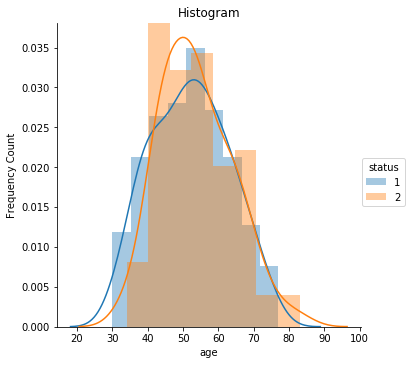

In [22]:
sns.FacetGrid(hm,hue = 'status',size = 5) \
.map(sns.distplot,'age') \
.add_legend()
plt.title('Histogram')
plt.ylabel('Frequency Count')
plt.show()

# 1.1.2 CDF and PDF

In [24]:
a = hm.loc[hm['status'] == 1]
b = hm.loc[hm['status'] == 2]

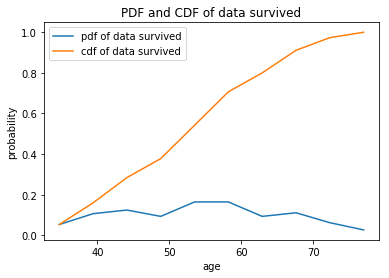

In [26]:
counts , bin_edges = np.histogram(a['age'],bins = 10,density = True)
pdf = counts / (sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = 'pdf of data survived')
plt.plot(bin_edges[1:],cdf,label = 'cdf of data survived')
plt.title('PDF and CDF of data survived')
plt.xlabel('age')
plt.ylabel('probability')
# plt.legend()

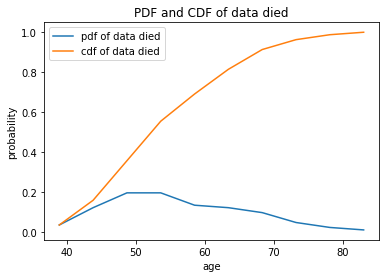

In [27]:
counts , bin_edges = np.histogram(b['age'],bins = 10,density = True)
pdf = counts / (sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = 'pdf of data died')
plt.plot(bin_edges[1:],cdf,label = 'cdf of data died')
plt.title('PDF and CDF of data died')
plt.xlabel('age')
plt.ylabel('probability')
plt.legend()

# 1.1.3 Box Plot 

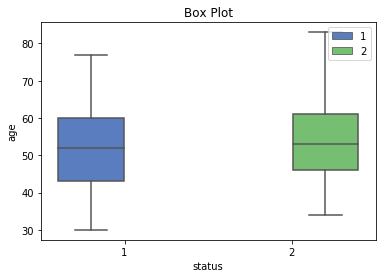

In [59]:
p = sns.boxplot(x='status',y='age',hue='status',data=hm,palette='muted')
plt.title("Box Plot")
plt.legend(loc='upper right')
plt.show()

# 1.1.4 Violin Plot

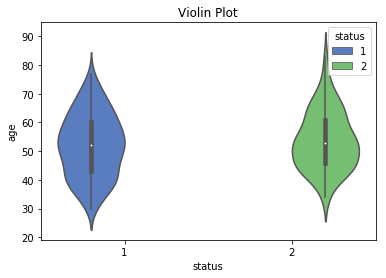

In [60]:

sns.violinplot(x='status', y='age',hue = 'status' ,data = hm, palette = 'muted')
plt.title('Violin Plot')
plt.show()

# Observation
Age alone is not an important parameter to determine the survival of patient since the plots are not differentiatable.

# 1.2 Year 

# 1.2.1 Histogram

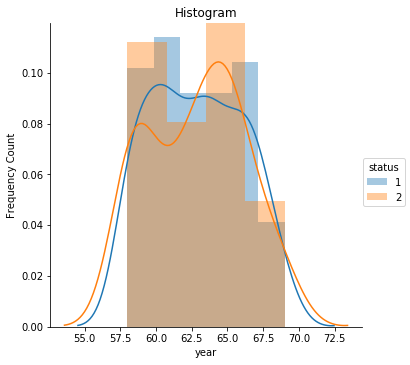

In [30]:
sns.FacetGrid(hm,hue = 'status',size = 5) \
.map(sns.distplot,'year') \
.add_legend()
plt.title('Histogram')
plt.ylabel('Frequency Count')
plt.show()

# 1.2.2 PDF and CDF

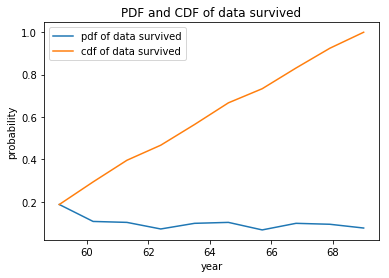

In [31]:
counts , bin_edges = np.histogram(a['year'],bins = 10,density = True)
pdf = counts / (sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = 'pdf of data survived')
plt.plot(bin_edges[1:],cdf,label = 'cdf of data survived')
plt.title('PDF and CDF of data survived')
plt.xlabel('year')
plt.ylabel('probability')
plt.legend()

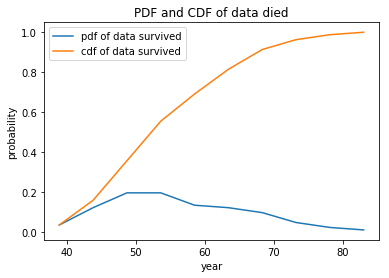

In [32]:
counts , bin_edges = np.histogram(b['age'],bins = 10,density = True)
pdf = counts / (sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = 'pdf of data survived')
plt.plot(bin_edges[1:],cdf,label = 'cdf of data survived')
plt.title('PDF and CDF of data died')
plt.xlabel('year')
plt.ylabel('probability')
plt.legend()

# 1.2.3 Boxplot

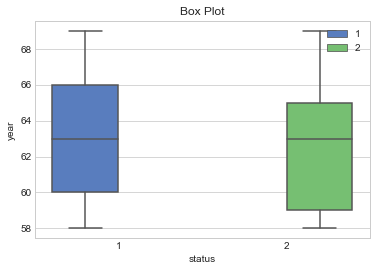

In [96]:
#sns.boxplot(x='status',y='year', data=hm)
sns.boxplot(x="status", y="year", hue="status",data=hm, palette="muted")
plt.legend(loc='upper right')
plt.title('Box Plot')
plt.show()


# 1.2.4 Violin Plot

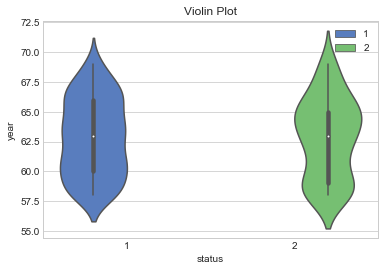

In [97]:
sns.violinplot(x="status", y="year",hue="status",data = hm,  palette="muted")
plt.legend(loc='upper right')
plt.title('Violin Plot')
plt.show()

# Observations

The patients who have done surgery after 1966 has higher chance for survival and those who have done surgery before 1960 has lower chance. (From 1.2.3 and 1.2.4)

# 1.3 Nodes

# 1.3.1 Histogram

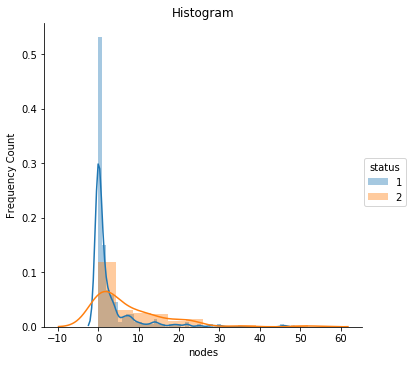

In [64]:
sns.FacetGrid(hm,hue = 'status',size = 5) \
.map(sns.distplot,'nodes') \
.add_legend()
plt.title('Histogram')
plt.ylabel('Frequency Count')
plt.show()

# 1.3.2 PDF and CDF

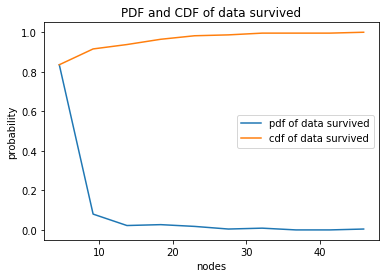

In [68]:
counts , bin_edges = np.histogram(a['nodes'],bins = 10,density = True)
pdf = counts / (sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = 'pdf of data survived')
plt.plot(bin_edges[1:],cdf,label = 'cdf of data survived')
plt.title('PDF and CDF of data survived')
plt.xlabel('nodes')
plt.ylabel('probability')
plt.legend()

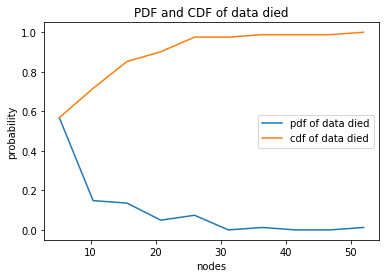

In [67]:
counts , bin_edges = np.histogram(b['nodes'],bins = 10,density = True)
pdf = counts / (sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,label = 'pdf of data died')
plt.plot(bin_edges[1:],cdf,label = 'cdf of data died')
plt.title('PDF and CDF of data died')
plt.xlabel('nodes')
plt.ylabel('probability')
plt.legend()

# 1.3.3 Boxplot

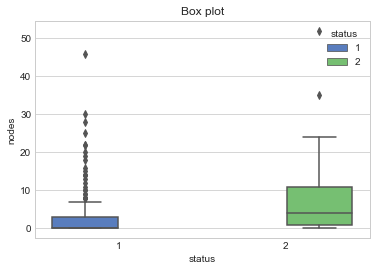

In [99]:
sns.boxplot(x='status',y='nodes',hue="status", data=hm,palette = 'muted')
plt.title("Box plot")
plt.show()

# 1.3.4 Violin Plot

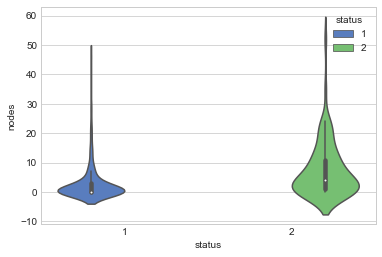

In [102]:
sns.violinplot(x="status", y="nodes",hue = 'status', data = hm, palette = 'muted')
plt.show()

# Observations
1. If the number of nodes is lesser than 0 , the patient will survive for long and if the nodes are greater than 0 and lesser than 4 , the patient is having a chance for longer survival.(from 1.3.1)
2. About 80% of the patients who has survived contains less than 5 number of nodes.(from 1.3.2).
3. Most of the patients that have nodes number greater than 12 will be in short survival. (from 1.3.3).
4. The survival spread is more for those who have 0 nodes. (from 1.3.4).

# 2. Bi-variate Analysis

# 2.1 Pair Plots

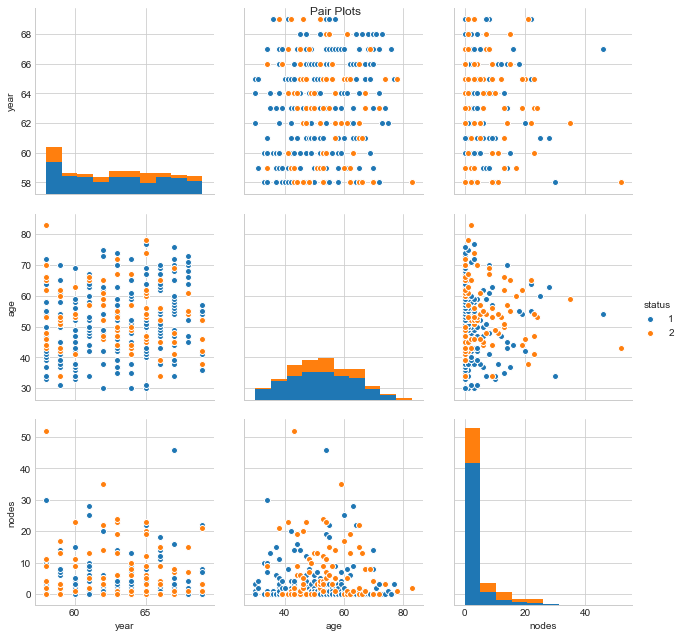

In [108]:
plt.close()
sns.set_style("whitegrid")
g=sns.pairplot(hm, x_vars = ["year","age","nodes"],y_vars = ["year","age","nodes"], hue="status", size = 3)
g.fig.suptitle("Pair Plots")
plt.show()


# Observation
1. Year and node are the features which are having a less overlapping of points than others

# 3.Multi-variate Analysis
# 3.1 Contour plots

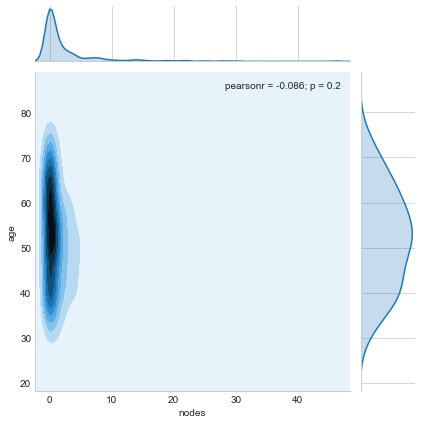

In [72]:
sns.jointplot(x="nodes", y="age", data=a, kind="kde");
plt.show()

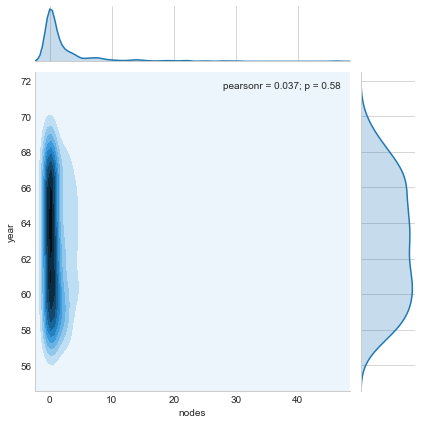

In [73]:
sns.jointplot(x="nodes", y="year", data=a, kind="kde");
plt.show()

# Observation
1. For patients havin age between 45 to 65 and number of nodes is 0 , is more likely to survive.

# Conclusion

1. When number of nodes increases , chances for survival decreases.
2. From the data it is clear that 225 has survived and 81 has died before five years. This difference in the number is due to the spread in the number of survivors for those with less than 5 number of Positive Auxillary Nodes.
2. Since 0 nodes doesn't guarantee the chance for survival , the given features are not enough to predict or diagnose cancer.